
Results for Max Scaling:
Mean Squared Error: 2042.0688482379646
Learned Coefficients (Weights):
[[970.68201825]
 [848.0673906 ]]
Bias (Intercept): 1248.161630212336


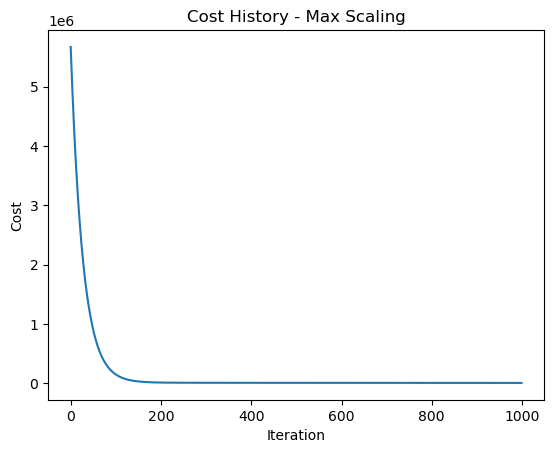


Results for Mean Normalization:
Mean Squared Error: 17365.373922900733
Learned Coefficients (Weights):
[[316.12594094]
 [535.19603576]]
Bias (Intercept): 2407.9552961821387


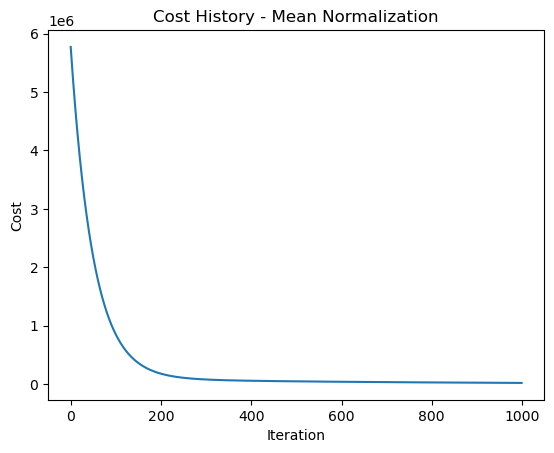


Results for Z-Score Normalization:
Mean Squared Error: 0.8110670689820058
Learned Coefficients (Weights):
[[172.75879895]
 [276.64937111]]
Bias (Intercept): 2411.492747754207


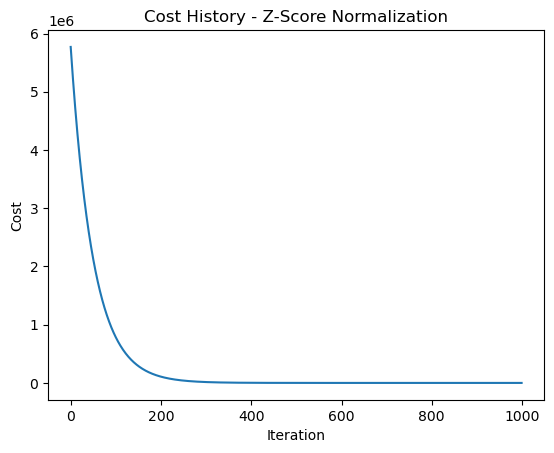


Comparison of Scaling Methods:
Max Scaling: MSE = 2042.07
Mean Normalization: MSE = 17365.37
Z-Score Normalization: MSE = 0.81

Best performing method: Z-Score Normalization with MSE = 0.81


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate synthetic data with different feature scales
def generate_data():
    np.random.seed(0)
    temperature = 20 + 20 * np.random.rand(100, 1)  # Range [20, 40]
    ice_cream_sales = 200 * np.random.rand(100, 1)  # Range [0, 200]
    X = np.hstack((temperature, ice_cream_sales))
    y = 1000 + 30 * temperature + 5 * ice_cream_sales + np.random.randn(100, 1)
    return X, y

# Feature scaling methods
def max_scaling(X):
    """Scale features to [0, 1] range using max value"""
    X_max = np.max(X, axis=0)
    X_scaled = X / X_max
    return X_scaled

def mean_normalization(X):
    """Scale features to have mean=0 and range [-1, 1]"""
    X_mean = np.mean(X, axis=0)
    X_max = np.max(X, axis=0)
    X_min = np.min(X, axis=0)
    X_scaled = (X - X_mean) / (X_max - X_min)
    return X_scaled

def z_score_normalization(X):
    """Standardize features to have mean=0 and std=1"""
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_scaled = (X - X_mean) / X_std
    return X_scaled

# Linear regression functions
def compute_cost(X, y, w, b):
    """Compute the mean squared error cost"""
    m = len(X)
    y_pred = np.dot(X, w) + b
    cost = np.mean((y_pred - y) ** 2)
    return cost

def gradient_descent(X, y, w, b, alpha, num_iterations):
    """Perform gradient descent optimization"""
    m = len(X)
    cost_history = []
    
    for iteration in range(num_iterations):
        # Compute predictions
        y_pred = np.dot(X, w) + b
        
        # Compute gradients
        w_gradient = (1 / m) * np.dot(X.T, (y_pred - y))
        b_gradient = (1 / m) * np.sum(y_pred - y)
        
        # Update weights and bias
        w -= alpha * w_gradient.reshape(-1, 1)
        b -= alpha * b_gradient
        
        # Store cost for plotting
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        
    return w, b, cost_history

def train_and_evaluate(X_scaled, y, scaling_method_name):
    """Train model and evaluate performance"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Initialize parameters
    n_features = X_train.shape[1]
    w = np.zeros((n_features, 1))
    b = 0
    alpha = 0.01
    num_iterations = 1000
    
    # Train model
    w, b, cost_history = gradient_descent(X_train, y_train, w, b, alpha, num_iterations)
    
    # Evaluate
    y_pred = np.dot(X_test, w) + b
    mse = np.mean((y_pred - y_test) ** 2)
    
    print(f"\nResults for {scaling_method_name}:")
    print("Mean Squared Error:", mse)
    print("Learned Coefficients (Weights):")
    print(w)
    print("Bias (Intercept):", b)
    
    # Plot cost history
    plt.figure()
    plt.plot(cost_history)
    plt.title(f'Cost History - {scaling_method_name}')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()
    
    return mse

# Main execution
def main():
    X, y = generate_data()
    
    # Apply different scaling methods
    scaling_methods = {
        'Max Scaling': max_scaling,
        'Mean Normalization': mean_normalization,
        'Z-Score Normalization': z_score_normalization
    }
    
    results = {}
    
    for name, method in scaling_methods.items():
        X_scaled = method(X)
        mse = train_and_evaluate(X_scaled, y, name)
        results[name] = mse
    
    # Compare results
    print("\nComparison of Scaling Methods:")
    for name, mse in results.items():
        print(f"{name}: MSE = {mse:.2f}")
    
    # Find best method
    best_method = min(results, key=results.get)
    print(f"\nBest performing method: {best_method} with MSE = {results[best_method]:.2f}")

if __name__ == "__main__":
    main()